# **Boston House Price Prediction**

# **Step 1: Load and Preprocess the Data**

Saving HousingData.csv to HousingData.csv
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.00

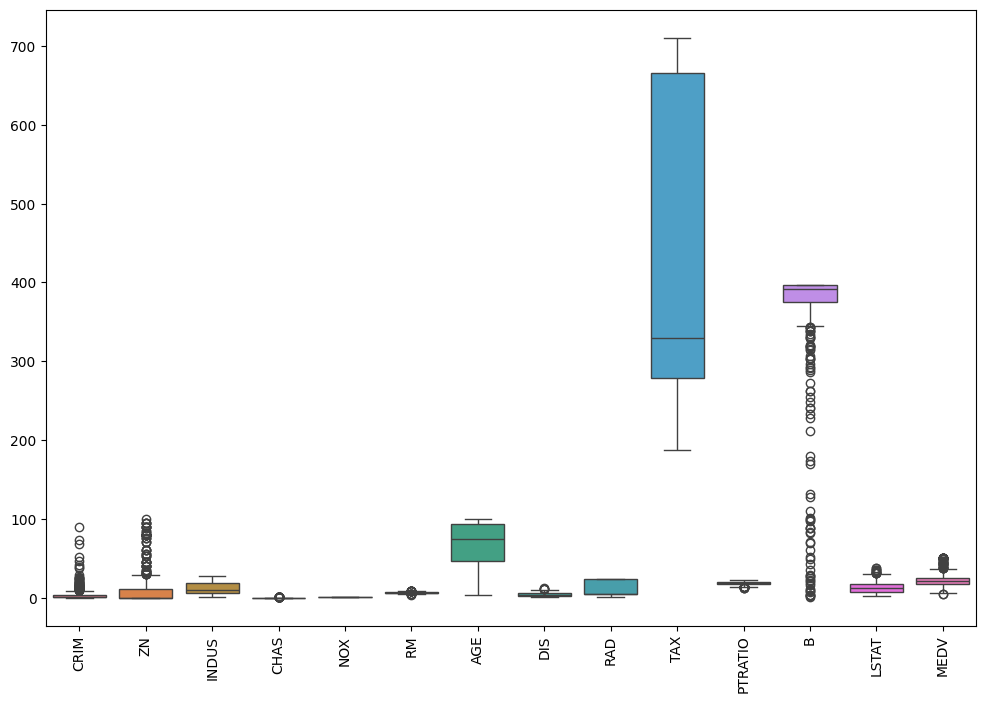

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))
print(data.head())
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)
print(data.describe())
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Print the column names to inspect them
print(data.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


# **Step 2: Feature Selection and Target Variable**

In [ ]:
# Use the correct column name for the target variable, which is 'MEDV'
X = data.drop(columns=['MEDV'])  # Features
y = data['MEDV']  # Target

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with scaling and model training
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can proceed with your model training and evaluation


# 3. Model **Selection**

**Linear Regression:**

In [ ]:
# Importing Linear Regression and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R-squared Score: {r2_lr}")


Linear Regression Mean Squared Error: 25.017672023842852
Linear Regression R-squared Score: 0.658852019550812


**Decision Tree Regressor:**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared Score: {r2_dt}")


Decision Tree Mean Squared Error: 11.666960784313725
Decision Tree R-squared Score: 0.8409060560968563


**Gradient Boosting Regressor:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting R-squared Score: {r2_gbr}")


Gradient Boosting Mean Squared Error: 7.3640386629377685
Gradient Boosting R-squared Score: 0.8995819069249646


# **Step 4:Evaluation**

In [ ]:
# Evaluation of Linear Regression
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R²: {r2_lr}")

# Evaluation of Decision Tree
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R²: {r2_dt}")

# Evaluation of Gradient Boosting
print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting R²: {r2_gbr}")


Linear Regression MSE: 25.017672023842852
Linear Regression R²: 0.658852019550812
Decision Tree MSE: 11.666960784313725
Decision Tree R²: 0.8409060560968563
Gradient Boosting MSE: 7.3640386629377685
Gradient Boosting R²: 0.8995819069249646


# **Step 5:Fine-Tuning**

In [ ]:
# Fine-tuning the Gradient Boosting Regressor
gbr_tuned = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbr_tuned.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gbr_tuned = gbr_tuned.predict(X_test_scaled)

# Evaluate the fine-tuned model
mse_gbr_tuned = mean_squared_error(y_test, y_pred_gbr_tuned)
r2_gbr_tuned = r2_score(y_test, y_pred_gbr_tuned)

print(f"Tuned Gradient Boosting MSE: {mse_gbr_tuned}")
print(f"Tuned Gradient Boosting R²: {r2_gbr_tuned}")


Tuned Gradient Boosting MSE: 5.260544405481728
Tuned Gradient Boosting R²: 0.9282657435798576


# **Step 6:Hyperparameter Tuning**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best score found:  14.692194541258434


In [ ]:
# Check for missing values in the original dataset
print(data.isnull().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


**Randomized Search**

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Now scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Step 7:Cross-Validation**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 11),
}

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

# Fit Randomized Search
random_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", -random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'learning_rate': 0.19299193510875617, 'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 111}
Best score found:  13.267099450361235


# **Step 8:Feature Engineering**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gbr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validation MSE Scores: ", -cv_scores)
print("Mean CV MSE: ", -cv_scores.mean())
print("Standard Deviation of CV MSE: ", cv_scores.std())


Cross-Validation MSE Scores:  [ 9.854227   27.60312187 10.99664088 12.48962306 12.5173599 ]
Mean CV MSE:  14.692194541258434
Standard Deviation of CV MSE:  6.532018340929902


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)

# Use these features for training
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Fit a model to get feature importances
gbr.fit(X_train_scaled, y_train)
model = SelectFromModel(gbr, threshold="mean", prefit=True)

# Transform the features
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)


In [ ]:
# Example interaction feature creation
data['RM_DIS'] = data['RM'] * data['DIS']


In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)


X_train_scaled shape: (404, 13)
y_train shape: (323,)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

# Load the dataset
data = pd.read_csv('HousingData.csv')  # Adjust path as necessary

# Define features and target
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

# Feature selection
model = SelectFromModel(gbr, threshold="mean", prefit=True)
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)


In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)


X_train_scaled shape: (404, 13)
y_train shape: (404,)
X_test_scaled shape: (102, 13)
X_train_selected shape: (404, 3)
X_test_selected shape: (102, 3)
